Импортируйте библиотеку pandas. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [4]:
import pandas as pd
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [7]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [8]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [9]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы через запятую и пробел в порядке возрастания.

In [10]:
success_counts = logs.loc[logs.success == True].client.value_counts()

In [11]:
max_num = success_counts.max()

In [12]:
max_success_users = success_counts.loc[success_counts == max_num]

In [13]:
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

С какой платформы осуществляется наибольшее количество успешных операций?

In [14]:
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

Какая платформа наиболее популярна среди премиумных клиентов?

In [15]:
premium_logs = logs.merge(user_data, on='client')

In [17]:
premium_logs.loc[premium_logs.premium == True].platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

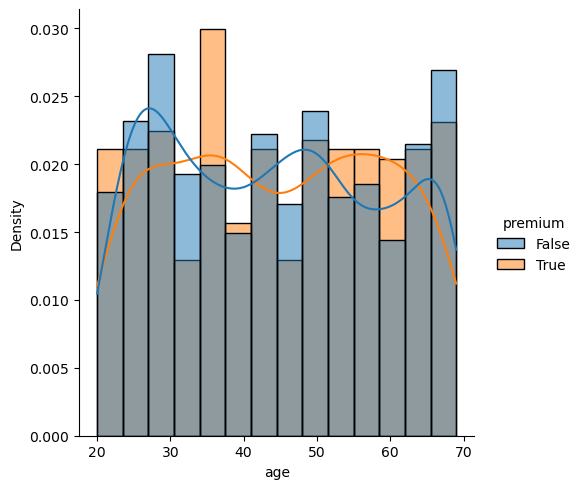

In [38]:
sns.displot(data=premium_logs, x='age', hue='premium', kde=True, kind='hist', stat='density',
           common_norm=False, bins=14)

Постройте график распределения числа успешных операций: 

x – число успешных операций

y – число клиентов, совершивших эти операции

In [40]:
successes = logs.loc[logs.success == True].client.value_counts()

<AxesSubplot:xlabel='client', ylabel='count'>

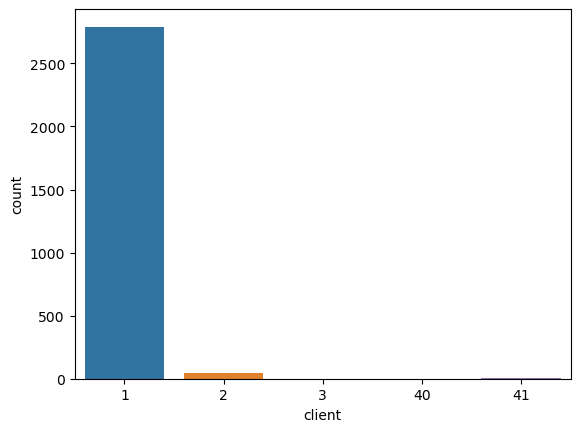

In [41]:
sns.countplot(x=successes)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций.

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='count'>

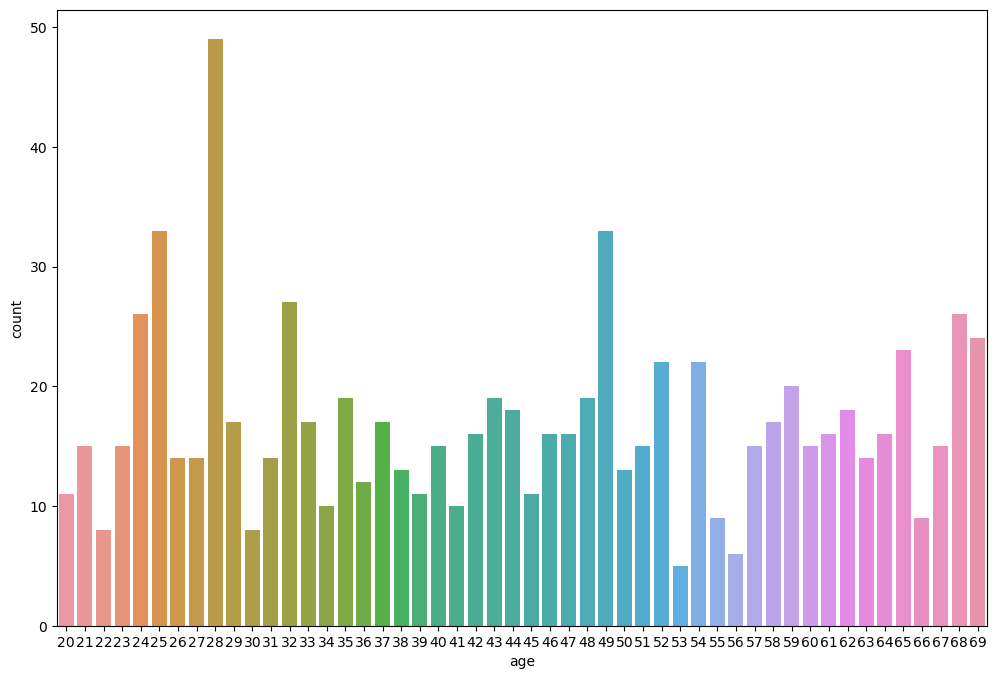

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer') & (premium_logs.success == True)], x='age')